# 02. Neutal Network classification with PyTorch

## 1. Make classification data

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
# Make a 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
					noise=0.03,
					random_state=42)

len(X), len(y)

(1000, 1000)

In [3]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [4]:
# Make a DataFram of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
						"X2": X[:, 1],
						"label": y})

circles.head()

/var/folders/q2/8ff21qsd0v9g8zx38dnmsvd40000gn/T/ipykernel_3274/3781118630.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


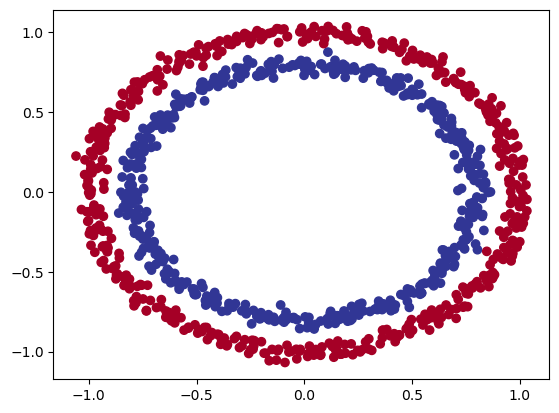

In [5]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
			y=X[:, 1],
			c=y,
			cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View some examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### 1.2 Turn data into tensors and create train/test split

In [8]:
# Because default type for Numpy is float64, we need to cast to to float32
X.dtype

dtype('float64')

In [9]:
# Turn data into tensors and cast to float32
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [11]:
# Split data into training/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

In [12]:
from torch import nn

# Device agnostic
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [13]:
# Construct a model
class CircleModelV0(nn.Module):
	def __init__(self):
		super().__init__()

		# Create 2 nn.Linear layers, capable of handling shapes of data
		self.layer_1 = nn.Linear(in_features=2,
						   out_features=5)
		self.layer_2 = nn.Linear(in_features=5,
						   out_features=1)
		
	# Define a forward method that outlines the forward pass
	def forward(self, x: torch.Tensor) -> torch.Tensor:
		return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
	
# Instentiate an instance of model class and send it to device
model_0 = CircleModelV0().to(device)
model_0, model_0.state_dict(), next(model_0.parameters())

(CircleModelV0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer_1.weight',
               tensor([[-0.3068,  0.0736],
                       [ 0.3352, -0.2707],
                       [ 0.2648,  0.6438],
                       [-0.4597,  0.6856],
                       [-0.4625,  0.2938]], device='mps:0')),
              ('layer_1.bias',
               tensor([ 0.2272, -0.3945,  0.4978, -0.2025,  0.5875], device='mps:0')),
              ('layer_2.weight',
               tensor([[ 0.3921, -0.3615,  0.4227,  0.3392, -0.2378]], device='mps:0')),
              ('layer_2.bias', tensor([-0.1227], device='mps:0'))]),
 Parameter containing:
 tensor([[-0.3068,  0.0736],
         [ 0.3352, -0.2707],
         [ 0.2648,  0.6438],
         [-0.4597,  0.6856],
         [-0.4625,  0.2938]], device='mps:0', requires_grad=True))

In [14]:
# Replicating model above with Sequential class
model_0a = nn.Sequential(
	nn.Linear(in_features=2, out_features=5),
	nn.Linear(in_features=5, out_features=1)
).to(device)

model_0a, model_0a.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[ 3.7084e-01, -5.5996e-01],
                       [ 6.3710e-01,  2.4921e-01],
                       [ 5.9950e-01, -3.2485e-01],
                       [ 2.1220e-01, -4.4267e-01],
                       [-5.8633e-04,  7.6236e-02]], device='mps:0')),
              ('0.bias',
               tensor([ 0.2589,  0.0864,  0.3799, -0.1125, -0.0473], device='mps:0')),
              ('1.weight',
               tensor([[-0.3984, -0.0558,  0.3971, -0.3244, -0.1556]], device='mps:0')),
              ('1.bias', tensor([-0.2938], device='mps:0'))]))

In [15]:
# Make predictions with model
with torch.inference_mode():
	untrained_preds = model_0a(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)} | Shape: {untrained_preds.shape}")
print(f"First 5 predictions: {untrained_preds[:5]}")

Length of predictions: 200 | Shape: torch.Size([200, 1])
First 5 predictions: tensor([[-0.0572],
        [-0.0038],
        [-0.2639],
        [ 0.0017],
        [-0.3703]], device='mps:0')


### 2.1 Setup loss function and optimizer

In [16]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in
optimizer = torch.optim.SGD(params=model_0a.parameters(),
							lr=0.1)

In [17]:
# Calculate accuracy - percentage of correct answers 
def accuracy_fn(y_true, y_pred):
	correct = torch.eq(y_true, y_pred).sum().item()
	acc = (correct/len(y_pred)) * 100
	return acc

### 3. Train a model

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Model outputs are going to be raw **logits**. We can convert those **logits** into prediction probabilities by passing them into some kind of activation function (e.g. sigmoid for binary classification).

Then we can convert those to **prediction labels** by either rounding them or taking the `argmax()`.

In [18]:
# View the first 5 outputs
model_0a.eval()
with torch.inference_mode():
	y_logits = model_0a(X_test.to(device))[:5]
	
y_logits

tensor([[-0.0572],
        [-0.0038],
        [-0.2639],
        [ 0.0017],
        [-0.3703]], device='mps:0')

In [19]:
# Use the sigmoid activation function on model's logits t get prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4857],
        [0.4990],
        [0.4344],
        [0.5004],
        [0.4085]], device='mps:0')

In [20]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0a(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True], device='mps:0')


### 3.2 Build train and test loop

In [21]:
torch.manual_seed(42)

# Set the number of epochs
EPOCHS=100

# Data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build the training and evaluation loop
for epoch in range(EPOCHS+1):
	### TRAINING
	model_0a.train()

	# Forward pass
	y_logits = model_0a(X_train).squeeze()
	y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

	# Calculate the loss/accuracy
	loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss expects raw logits as input
	acc = accuracy_fn(y_true=y_train,
				   y_pred=y_pred)
	
	# Optimizer zero grad
	optimizer.zero_grad()

	# Loss backward (backpropagation)
	loss.backward()

	# Optimizer step (gradient descent)
	optimizer.step()

	### TESTING
	model_0a.eval()
	with torch.inference_mode():
		# Forward pass
		test_logits = model_0a(X_test).squeeze()
		test_pred = torch.round(torch.sigmoid(test_logits))

		# Calculate test loss/acc
		test_loss = loss_fn(test_logits, y_test)
		test_acc = accuracy_fn(y_true=test_pred,
					y_pred=y_test)
		
	# Print training status
	if epoch % 10 == 0:
		print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69987 | Acc: 46.38% | Test loss: 0.70388 | Test acc: 44.50%
Epoch: 10 | Loss: 0.69611 | Acc: 45.25% | Test loss: 0.70043 | Test acc: 47.00%
Epoch: 20 | Loss: 0.69451 | Acc: 47.62% | Test loss: 0.69885 | Test acc: 46.00%
Epoch: 30 | Loss: 0.69381 | Acc: 48.88% | Test loss: 0.69803 | Test acc: 46.00%
Epoch: 40 | Loss: 0.69349 | Acc: 50.00% | Test loss: 0.69755 | Test acc: 45.00%
Epoch: 50 | Loss: 0.69333 | Acc: 50.38% | Test loss: 0.69721 | Test acc: 45.50%
Epoch: 60 | Loss: 0.69324 | Acc: 50.75% | Test loss: 0.69694 | Test acc: 46.00%
Epoch: 70 | Loss: 0.69319 | Acc: 51.25% | Test loss: 0.69672 | Test acc: 46.00%
Epoch: 80 | Loss: 0.69315 | Acc: 51.25% | Test loss: 0.69652 | Test acc: 46.00%
Epoch: 90 | Loss: 0.69312 | Acc: 51.38% | Test loss: 0.69635 | Test acc: 46.00%
Epoch: 100 | Loss: 0.69309 | Acc: 51.38% | Test loss: 0.69619 | Test acc: 45.00%


## 4. Make predictions and evalaute the model
From the metrics looks like model is not learning at all. Let's make some predcitions and visualize them.

In [22]:
import requests
from pathlib import Path

# Download helper functions from repo (if not done already)
if Path('helper_functions.py').is_file():
	print('helper_functions.py exists, skipping')
else:
	url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
	print("Downloading helper_functions.py")
	request = requests.get(url)
	with open("helper_functions.py", 'wb') as f:
		f.write(request.content)

helper_functions.py exists, skipping


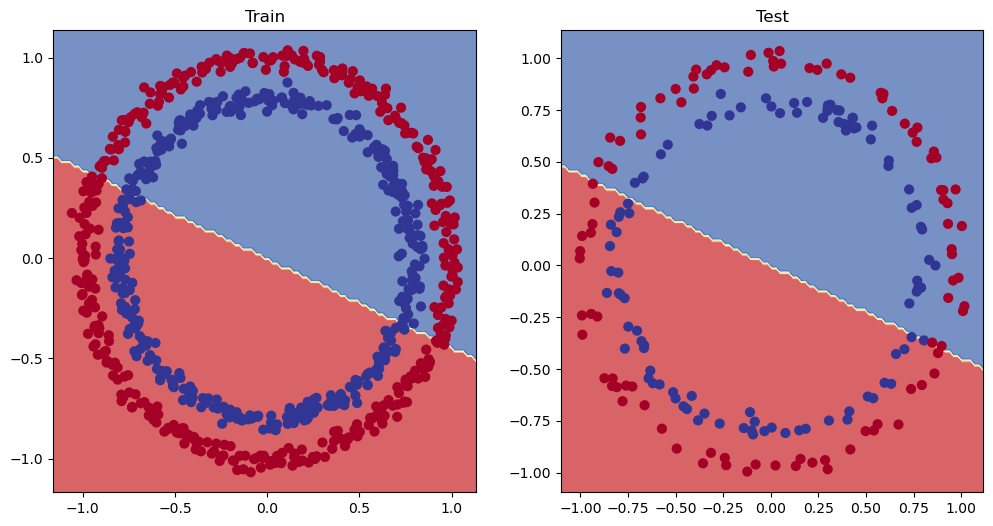

In [23]:
# Plot decision boundaries
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0a, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0a, X_test, y_test)

## 5. Improving a model
* add more layers
* add more neurons
* fit for longer
* change the activation function
* change the learning rate
* change the loss function


In [24]:
class CircleModelV1(nn.Module):
	def __init__(self):
		super().__init__()
		self.layer_1 = nn.Linear(in_features=2, out_features=10)
		self.layer_2 = nn.Linear(in_features=10, out_features=10)
		self.layer_3 = nn.Linear(in_features=10, out_features=1)

	def forward(self, x):
		#z = self.layer_1(x)
		#z = self.layer_2(z)
		#z = self.layer_3(z)
		return self.layer_3(self.layer_2(self.layer_1(x)))
	
model_1 = CircleModelV1().to(device)
model_1.parameters

<bound method Module.parameters of CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)>

In [25]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
							lr=0.1)

In [26]:
# Write training/eval loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs+1):
	### Training
	model_1.train()

	# Forward pass
	y_logits = model_1(X_train).squeeze()
	y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediciton labels

	# Calculate the loss/acc
	loss = loss_fn(y_logits, y_train)
	acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

	# Optimizer zero grad
	optimizer.zero_grad()

	# Loss backwards
	loss.backward()

	# Optimizer step (gradient descent)
	optimizer.step()

	### Testing
	model_1.eval()
	with torch.inference_mode():
		# Forward pass
		test_logits = model_1(X_test).squeeze()
		test_pred = torch.round(torch.sigmoid(test_logits))

		# Calculate loss
		test_loss = loss_fn(test_logits, y_test)
		test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

	if epoch % 100 == 0:
		print(f"Epoch: {epoch} | Loss: {loss:.5} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 | Test acc: 51.00%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test loss: 0.69379 | Test acc: 48.00%
Epoch: 200 | Loss: 0.69299 | Acc: 51.12% | Test loss: 0.69437 | Test acc: 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.62% | Test loss: 0.69458 | Test acc: 45.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.12% | Test loss: 0.69465 | Test acc: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69467 | Test acc: 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 1000 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%


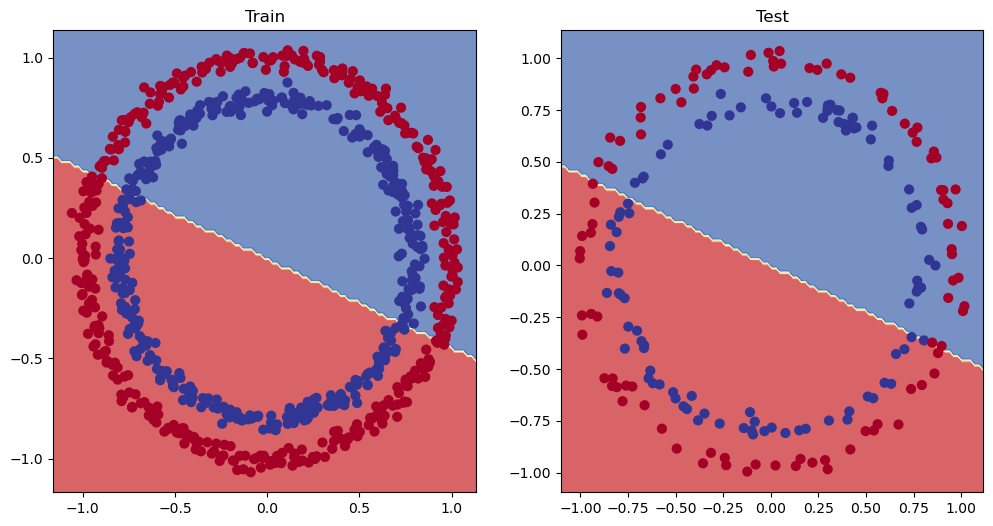

In [27]:
# Plot decision boundaries
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0a, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0a, X_test, y_test)

## 6. Missing piece: non-linearity

In [28]:
# Build a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
	def __init__(self):
		super().__init__()

		self.layer_1 = nn.Linear(in_features=2, out_features=10)
		self.layer_2 = nn.Linear(in_features=10, out_features=10)
		self.layer_3 = nn.Linear(in_features=10, out_features=1)
		self.relu = nn.ReLU()

	def forward(self, x):
		return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
	
model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [29]:
# Loss / optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
							lr=0.1)

In [30]:
# Set randomness
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

### Training
for epoch in range(epochs+1):
	model_2.train()
	
	# Forward pass
	y_logits = model_2(X_train).squeeze()
	y_pred = torch.round(torch.sigmoid(y_logits))

	# Loss / acc
	loss = loss_fn(y_logits, y_train)
	acc = accuracy_fn(y_true=y_train,
				   y_pred=y_logits)
	
	# Zero grad
	optimizer.zero_grad()
	
	# Loss backward
	loss.backward()

	# Step
	optimizer.step()

	### Testing
	model_2.eval()
	with torch.inference_mode():
		test_logits = model_2(X_test).squeeze()
		test_pred = torch.round(torch.sigmoid(test_logits))

		# Calculate loss
		test_loss = loss_fn(test_logits, y_test)
		test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

	if epoch % 100 == 0:
		print(f"Epoch: {epoch} | Loss: {loss:.5} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")
		

Epoch: 0 | Loss: 0.69295 | Acc: 0.00% | Test loss: 0.69319 | Test acc: 50.00%
Epoch: 100 | Loss: 0.69115 | Acc: 0.00% | Test loss: 0.69102 | Test acc: 52.50%
Epoch: 200 | Loss: 0.68977 | Acc: 0.00% | Test loss: 0.68940 | Test acc: 55.00%
Epoch: 300 | Loss: 0.68795 | Acc: 0.00% | Test loss: 0.68723 | Test acc: 56.00%
Epoch: 400 | Loss: 0.68517 | Acc: 0.00% | Test loss: 0.68411 | Test acc: 56.50%
Epoch: 500 | Loss: 0.68102 | Acc: 0.00% | Test loss: 0.67941 | Test acc: 56.50%
Epoch: 600 | Loss: 0.67515 | Acc: 0.00% | Test loss: 0.67285 | Test acc: 56.00%
Epoch: 700 | Loss: 0.66659 | Acc: 0.00% | Test loss: 0.66322 | Test acc: 59.00%
Epoch: 800 | Loss: 0.6516 | Acc: 0.00% | Test loss: 0.64757 | Test acc: 67.50%
Epoch: 900 | Loss: 0.62362 | Acc: 0.00% | Test loss: 0.62145 | Test acc: 79.00%
Epoch: 1000 | Loss: 0.56818 | Acc: 0.00% | Test loss: 0.57378 | Test acc: 86.50%


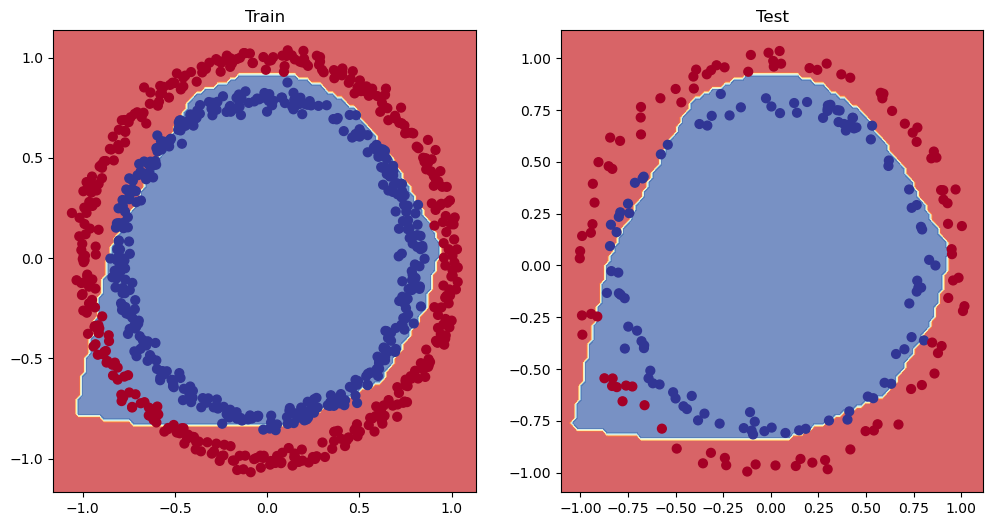

In [31]:
# Plot decision boundaries
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

## 7. Putting it all together - multiclass classification problem

### 7.1 Creating toy multi-class dataset

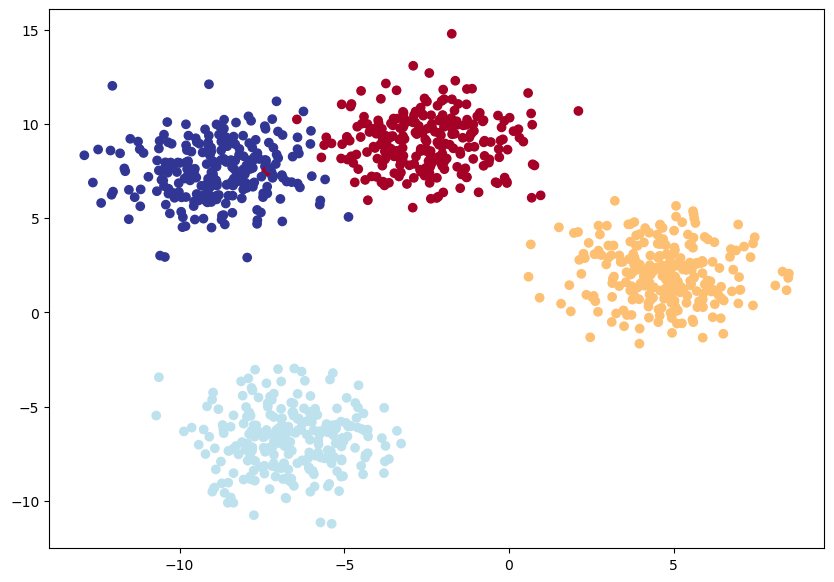

In [43]:
# Dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
							n_features=NUM_FEATURES,
							centers=NUM_CLASSES,
							cluster_std=1.5, # give some shake up for the clusters 
							random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train/test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
	X_blob,
	y_blob,
	test_size=0.2,
	random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 7.2 Building a multiclass classification model

In [44]:
# Create device agnostice code
#device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device = 'cpu'

In [45]:
# Build multiclass model
class BlobModel(nn.Module):
	def __init__(self, input_features, output_features, hidden_units=8):
		"""
		Initializes a multiclass classification model.

		Args:
			input_features (int): number of input features to the model
			output_features (int): number of output features (number of output classes)
			hidden_units (int) : number of hidden units between layers, default=8
		"""
		super().__init__()
		self.linear_layer_stack = nn.Sequential(
			nn.Linear(in_features=input_features, out_features=hidden_units),
			nn.Linear(in_features=hidden_units, out_features=hidden_units),
			nn.Linear(in_features=hidden_units, out_features=output_features)
		)

	def forward(self, x):
		return self.linear_layer_stack(x)
	
# Create a BlobModel and send it to device
model_3 = BlobModel(input_features=2,
					output_features=4,
					hidden_units=8).to(device)
model_3


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 7.3 Create a loss function and an optimizer

In [46]:
# Create a loss function
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),
							lr=0.1)

### 7.4 Get prediction probabilities for a multiclass problem
In order to evalaute and train the model, it's needed to convert our model's outputs (logits) to predcition probabilities and then predicition labels.

Logits -> Prediction probabilities -> Prediction labels

In [47]:
# Test run
model_3.eval()
with torch.inference_mode():
	y_preds = model_3(X_blob_train.to(device))
y_preds[:10]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804],
        [-0.5073, -1.2865, -0.7239,  0.3814],
        [ 0.6031, -1.6200,  0.4522,  1.5135],
        [-0.9233, -0.5593, -1.0775, -0.4963],
        [ 1.7228, -1.0307,  1.7717,  1.9579],
        [ 0.5619, -1.4183,  0.4359,  1.3289]])

In [48]:
# Convert logit outputs to pred probs
y_pred_probs = torch.softmax(y_preds, dim=1)
print(y_preds[:5]), print(y_pred_probs[:5])

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]])
tensor([[0.1838, 0.3422, 0.1500, 0.3239],
        [0.2199, 0.0377, 0.1839, 0.5586],
        [0.3406, 0.0482, 0.5326, 0.0785],
        [0.3405, 0.0657, 0.4446, 0.1492],
        [0.2527, 0.0424, 0.2283, 0.4766]])


(None, None)

In [49]:
# Convert model prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:5], y_blob_test[:5]

(tensor([1, 3, 2, 2, 3]), tensor([1, 3, 2, 1, 0]))

### 8.5 Create a training loop

In [50]:
# Fit the multiclass model to the data
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Set number of epochs
epochs = 100

# Transfer data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

In [51]:
# Loop through data
for epoch in range(epochs+1):
	### Training
	model_3.train()
	
	y_logits = model_3(X_blob_train)
	y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

	loss = loss_fn(y_logits, y_blob_train)
	acc = accuracy_fn(y_true=y_blob_train,
				   y_pred=y_pred)
	
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	### Testing
	model_3.eval()
	with torch.inference_mode():
		test_logits = model_3(X_blob_test)
		test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

		test_loss = loss_fn(test_logits, y_blob_test.long())
		test_acc = accuracy_fn(y_true=y_blob_test,
						 y_pred=test_preds)
		
		if epoch % 10 == 0:
			print(f"Epoch: {epoch} | Loss: {loss:.5} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.0432 | Acc: 65.50% | Test loss: 0.57861 | Test acc: 95.50%
Epoch: 10 | Loss: 0.14398 | Acc: 99.12% | Test loss: 0.13037 | Test acc: 99.00%
Epoch: 20 | Loss: 0.080617 | Acc: 99.12% | Test loss: 0.07216 | Test acc: 99.50%
Epoch: 30 | Loss: 0.059236 | Acc: 99.12% | Test loss: 0.05133 | Test acc: 99.50%
Epoch: 40 | Loss: 0.048919 | Acc: 99.00% | Test loss: 0.04098 | Test acc: 99.50%
Epoch: 50 | Loss: 0.04295 | Acc: 99.00% | Test loss: 0.03486 | Test acc: 99.50%
Epoch: 60 | Loss: 0.039099 | Acc: 99.00% | Test loss: 0.03083 | Test acc: 99.50%
Epoch: 70 | Loss: 0.036429 | Acc: 99.00% | Test loss: 0.02799 | Test acc: 99.50%
Epoch: 80 | Loss: 0.03448 | Acc: 99.00% | Test loss: 0.02587 | Test acc: 99.50%
Epoch: 90 | Loss: 0.033003 | Acc: 99.12% | Test loss: 0.02423 | Test acc: 99.50%
Epoch: 100 | Loss: 0.031849 | Acc: 99.12% | Test loss: 0.02293 | Test acc: 99.50%


### 7.6 Making and evaluating predictions

In [52]:
# Makre predictions
model_3.eval()
with torch.inference_mode():
	y_logits = model_3(X_blob_test)

# View first 10 preds
y_logits[:10]

tensor([[  4.3551,  10.3920, -14.9378,  -9.7940],
        [  5.0249, -12.0799,   3.3984,  10.6999],
        [ -5.6140, -13.3927,  21.0484,  12.8085],
        [  1.8479,   7.5879,  -8.6272,  -7.0156],
        [  8.0997,   3.3034, -14.6397,  -3.6309],
        [  5.5958, -15.0054,   5.0344,  13.3266],
        [ -5.9993, -10.2278,  18.9179,   9.9470],
        [  7.0976,  -0.7620,  -9.5784,   0.1726],
        [ -5.6194, -18.6659,  25.6036,  17.6314],
        [  7.3378,   0.7232, -11.2318,  -1.2062]])

In [53]:
# Logits -> pred probs
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.3832e-03, 9.9762e-01, 9.9620e-12, 1.7071e-09],
        [3.4166e-03, 1.2738e-10, 6.7180e-04, 9.9591e-01],
        [2.6337e-12, 1.1023e-15, 9.9974e-01, 2.6383e-04],
        [3.2043e-03, 9.9680e-01, 9.0462e-08, 4.5329e-07],
        [9.9180e-01, 8.1919e-03, 1.3207e-10, 7.9778e-06],
        [4.3880e-04, 4.9575e-13, 2.5030e-04, 9.9931e-01],
        [1.5085e-11, 2.1987e-13, 9.9987e-01, 1.2704e-04],
        [9.9863e-01, 3.8549e-04, 5.7164e-08, 9.8152e-04],
        [2.7534e-14, 5.9408e-20, 9.9966e-01, 3.4479e-04],
        [9.9847e-01, 1.3386e-03, 8.6032e-09, 1.9443e-04]])

In [54]:
# Pred probs -> pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

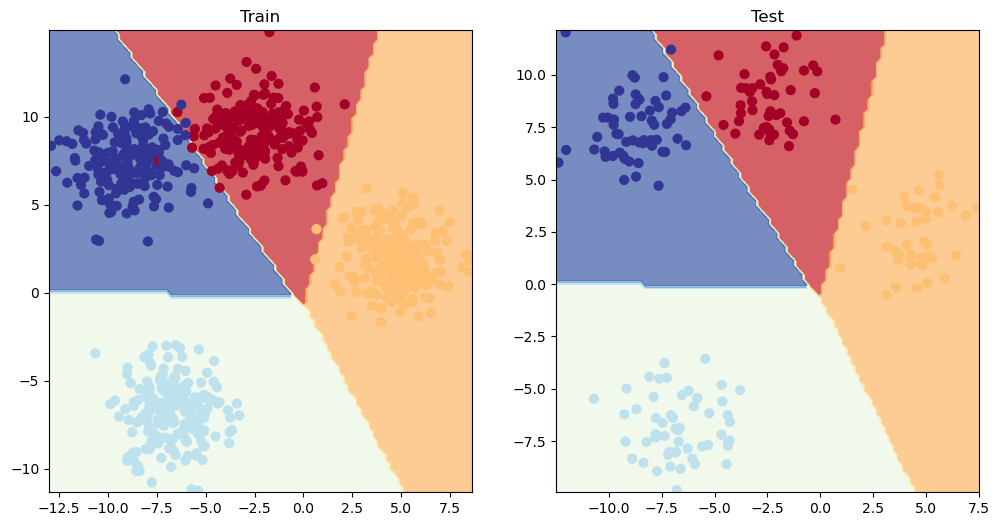

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_3, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_3, X_blob_test, y_blob_test)

## 8. Few more classification metrics
* Accuracy
* Precisiom
* Recall
* F1-score
* Confusion matrix
* Classification report

In [59]:
import torchmetrics

torchmetrics_acc = torchmetrics.Accuracy(
	task='multiclass', 
	num_classes=NUM_CLASSES)

torchmetrics_acc(y_preds, y_blob_test)

tensor(0.9950)